In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
# from dataprep import eda
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')


/home/apprenant/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/apprenant/.local/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks,

In [3]:
df = pd.read_csv('Boston_Housing.csv')

# Nettoyage / Analyse

In [4]:
df = df.drop(df.columns[-1], axis=1)

There are 14 attributes in each case of the dataset. They are:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

- CRIM : Taux de criminalité par habitant dans la ville
- ZN : Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : Proportion d'acres dédiés aux activités non commerciales par ville
- CHAS : Variable factice du fleuve Charles (1 si le terrain borde le fleuve, 0 sinon)
- NOX : Concentration d'oxydes d'azote (en parties par 10 millions)
- RM : Nombre moyen de pièces par logement
- AGE : Proportion d'unités occupées par le propriétaire construites avant 1940
- DIS : Distances pondérées vers cinq centres d'emploi de Boston
- RAD : Indice d'accessibilité aux autoroutes radiales
- TAX : Taux d'imposition foncière à pleine valeur par tranche de 10 000 dollars
- PTRATIO : Ratio élèves-enseignants par ville
- B : 1000 * (Bk - 0.63)^2, où Bk est la proportion de personnes noires par ville
- LSTAT : Pourcentage de la population à statut socio-économique faible
- MEDV : Valeur médiane des logements occupés par leur propriétaire en milliers de dollars

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# report = eda.create_report(df)
# report.show_browser()
# report.save('analyse_report') 

In [7]:
# profile = ProfileReport(df, title="Profiling Report")

In [8]:
# profile.to_file("Analyse_report.html")

In [9]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

ZN a 73.5% de valeurs égales à 0 (il s'agit d'une variable conditionnelle, pour les lot de plus de 25 000 sqft).   
CHAS a 93% de valeurs égales à 0, il s'agit d'une variable catégorielle.

In [10]:
np.shape(df)

(506, 14)

Le prix médian semble être plafonné à 50. On a testé de supprimé les lignes où MEDV est supérieure ou égale à 50 mais cela diminue la performance du modèle. On décide alors de conserver ces lignes.

In [11]:
# df = df[~(df['MEDV'] >= 50.0)]
# print(np.shape(df))

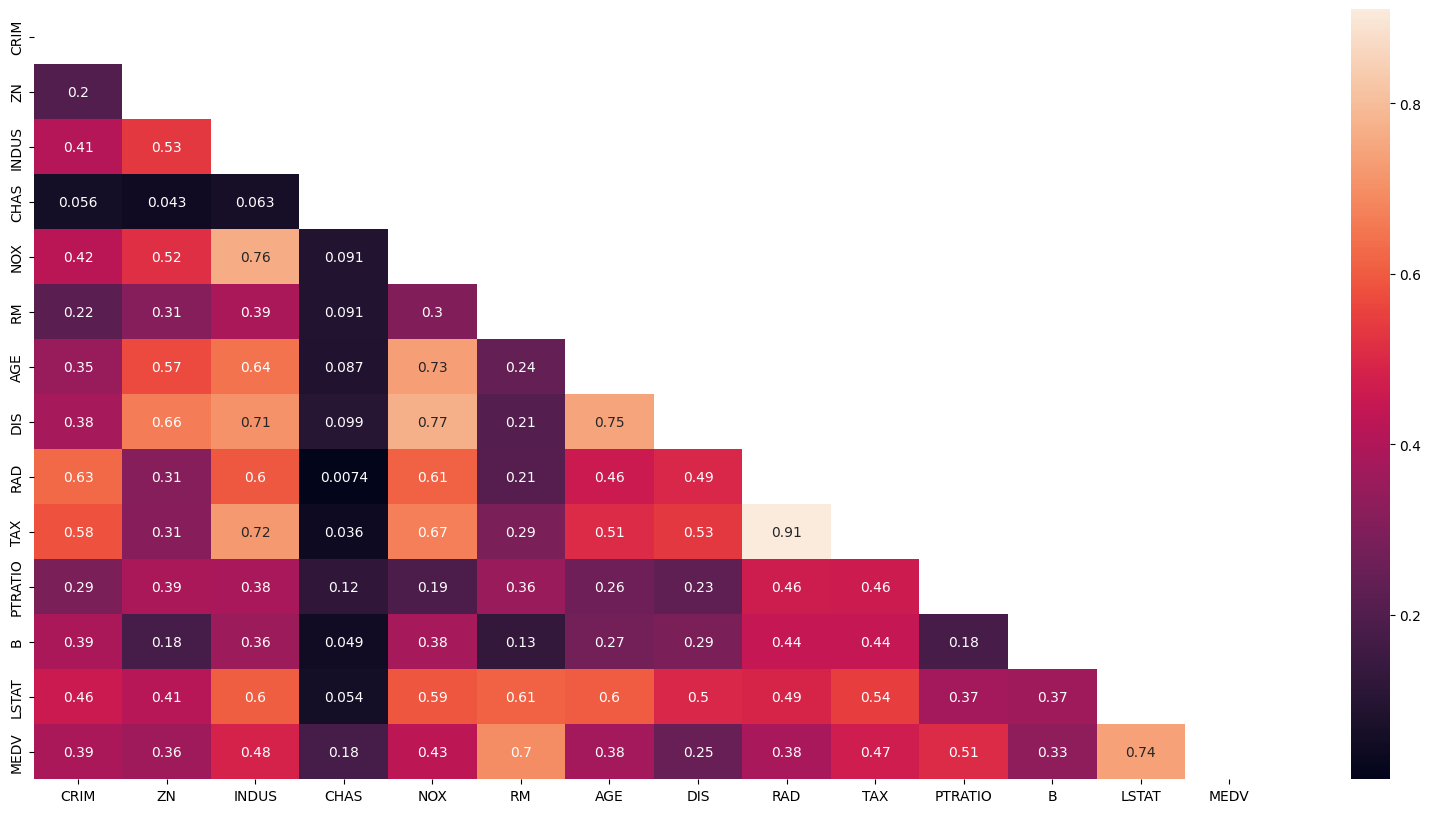

In [12]:
# Créez une figure et un axe
fig, ax = plt.subplots(figsize=(20, 10))

# Calculez la matrice de corrélation
corr_matrix = df.corr().abs()

# Créez un masque pour cacher la diagonale
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tracez le heatmap avec le masque
sns.heatmap(corr_matrix, annot=True, mask=mask, ax=ax)

# Affichez la figure
plt.show()

D'après la matrice de corrélation de :
- TAX et RAD très corrélées l'une à l'autre (0.91)
- RM, LSAT, PTRATIO très corrélées à MEDV (> 0.50)
- INDUS, NOX, TAX corrélation moyenne à MEDV (entre 0.5 et 0.4)
- CRIM, ZN, AGE, RAD peu corrélés à MEDV (entre 0.4 et 0.35)
- CHAS, DIS B très peu corrélés à MEDV (<0.35)

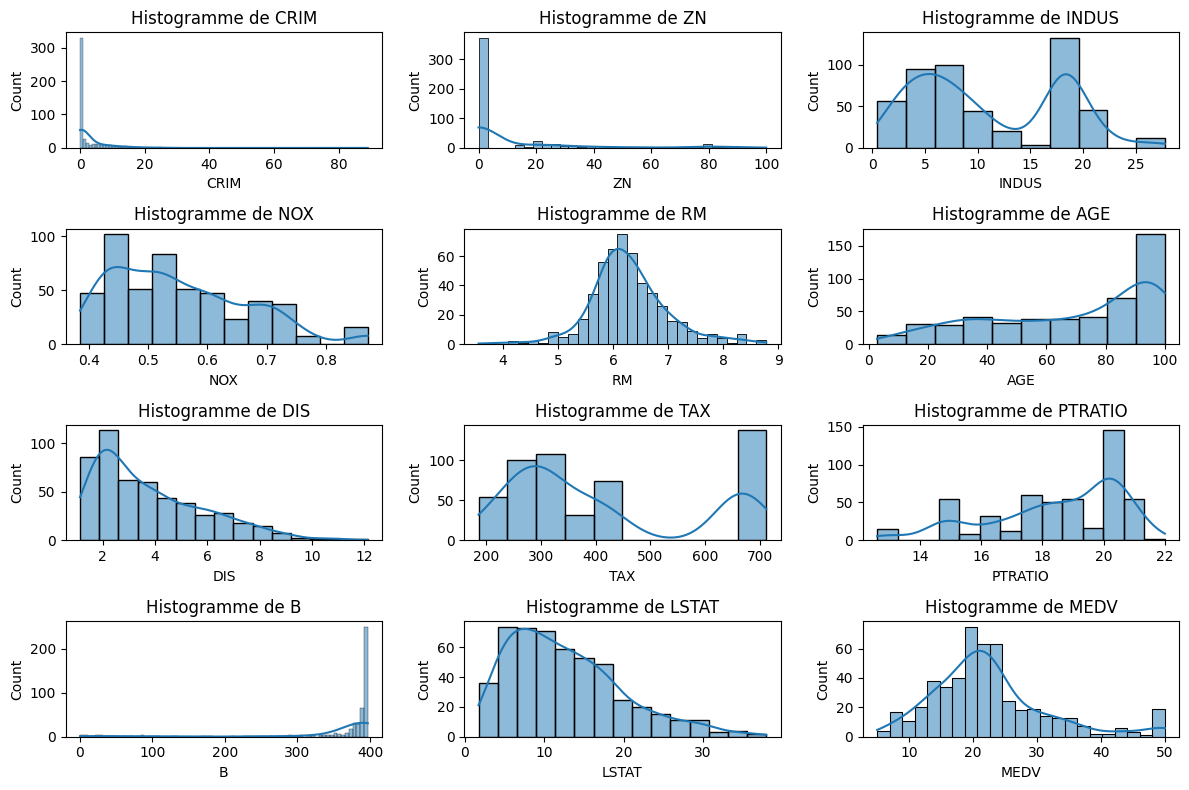

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables à inclure dans les histogrammes
variables = ['CRIM', 'ZN', 'INDUS' ,'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Calcul du nombre de lignes et de colonnes pour la grille
num_rows = 4  # Nombre de lignes
num_cols = 3  # Nombre de colonnes

# Création de la figure et des sous-tracés
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Aplatir la liste d'axes si nécessaire
if num_rows == 1:
    axes = [axes]

# Parcourir chaque variable et attribuer l'histogramme à un sous-tracé
for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row][col]

    sns.histplot(df[variable], ax=ax, kde=True)  # Trace l'histogramme avec la courbe
    ax.set_title(f'Histogramme de {variable}')  # Définir le titre du sous-tracé

# Supprimer les sous-tracés non utilisés
for i in range(len(variables), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row][col])

# Ajuster l'espacement entre les sous-tracés
fig.tight_layout()

# Afficher la figure
plt.show()


In [14]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


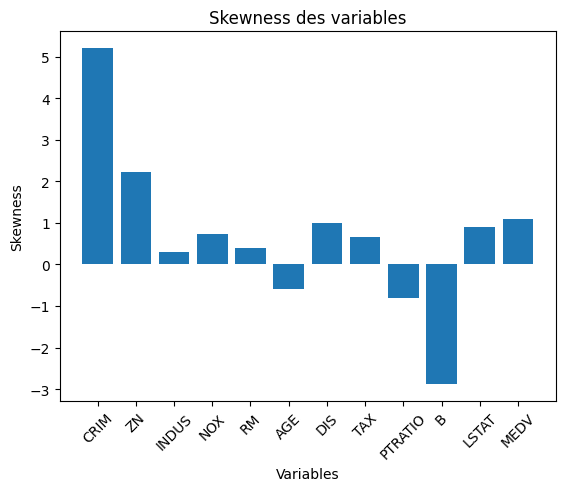

In [15]:
import scipy.stats as stats

data = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]

skewness = data.apply(lambda x: stats.skew(x)).to_dict()

variables = list(skewness.keys())
values = list(skewness.values())

plt.bar(variables, values)
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.title('Skewness des variables')
plt.xticks(rotation=45)
plt.show()


# Modélisation

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



## Choix du modèle 

### Tests du modèles naifs

In [17]:
df_score=pd.DataFrame(columns = ["reg_lin", "lasso", "ridge", "decision_tree", "random_forest"])

#### Regression linéaire naifs : 

In [18]:
Xn=df.drop("MEDV", axis=1)
yn=df["MEDV"]
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42)

modele_naif_reg_lin = linear_model.LinearRegression()
modele_naif_reg_lin.fit(Xn_train, yn_train )

modele_naif_lasso = linear_model.Lasso(alpha=1)
modele_naif_lasso.fit(Xn_train, yn_train )

modele_naif_ridge = linear_model.Ridge(alpha=1)
modele_naif_ridge.fit(Xn_train, yn_train )

# scoring sur X_test
df_score.loc[0, "reg_lin"] = modele_naif_reg_lin.score(Xn_test, yn_test)
df_score.loc[0, "lasso"] = modele_naif_lasso.score(Xn_test, yn_test)
df_score.loc[0, "ridge"] = modele_naif_ridge.score(Xn_test, yn_test)

print(df_score)


    reg_lin     lasso     ridge decision_tree random_forest
0  0.668759  0.667145  0.666222           NaN           NaN


#### Decision Tree

In [19]:
decision_tree_naif = DecisionTreeRegressor(random_state=42)
decision_tree_naif.fit(Xn_train, yn_train )

df_score.loc[0, "decision_tree"] = decision_tree_naif.score(Xn_test, yn_test)
print(df_score)


    reg_lin     lasso     ridge decision_tree random_forest
0  0.668759  0.667145  0.666222      0.857963           NaN


#### Random Forest 

In [20]:
random_forest_naif = RandomForestRegressor()
random_forest_naif.fit(Xn_train, yn_train )

df_score.loc[0, "random_forest"] = random_forest_naif.score(Xn_test, yn_test)
print(df_score)

    reg_lin     lasso     ridge decision_tree random_forest
0  0.668759  0.667145  0.666222      0.857963      0.870208


#### On choisi le modèle Random Forest

In [21]:
numerical_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        
        ('num', numerical_transformer, numerical_features),
    ], remainder="passthrough"
)

In [22]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor()

In [24]:
pipe_rf = Pipeline([
     ('prep', preprocessor),
     ('model', model)
])

# Entrainement sur X_train
trained_model = pipe_rf.fit(X_train,y_train)

# scoring sur X_test
print(trained_model.score(X_test, y_test))

0.8795124937500384


### Pycaret

In [25]:
# from pycaret.regression import *
# s = setup(df, target = 'MEDV', preprocess=True)

Étape de prétraitement :  
  
**numerical_imputer** : Cette étape utilise SimpleImputer pour remplacer les valeurs manquantes dans les variables numériques sélectionnées (CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT).  

**categorical_imputer** : Cette étape utilise SimpleImputer avec la stratégie "most_frequent" pour remplacer les valeurs manquantes dans les variables catégorielles (aucune variable catégorielle n'a été sélectionnée).   

Il n'y a pas de valeurs manquantes, j'enlève donc l'étape de pretraitement auto

#### Meilleurs modèles pycaret

In [26]:
# best_model = compare_models()
# print(best_model)

In [27]:
# s = setup(df, target = 'MEDV', preprocess=False)
# models_to_compare = ['gbr', 'catboost', 'rf', 'et']
# best = compare_models(include=models_to_compare)

CatBoostRegressor, Extra Trees Regressor et Gradient Boosting Regressor sont les 3 meilleures modèles. 

## Gradient Boosting Regresor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()

In [29]:
pipe_gbr= Pipeline([
     ('prep', preprocessor),
     ('model', model_gbr)
])

# Entrainement sur X_train
trained_model_gbr = pipe_gbr.fit(X_train,y_train)

# scoring sur X_test
print(trained_model_gbr.score(X_test, y_test))

0.9140172983959881


## Feature Importance

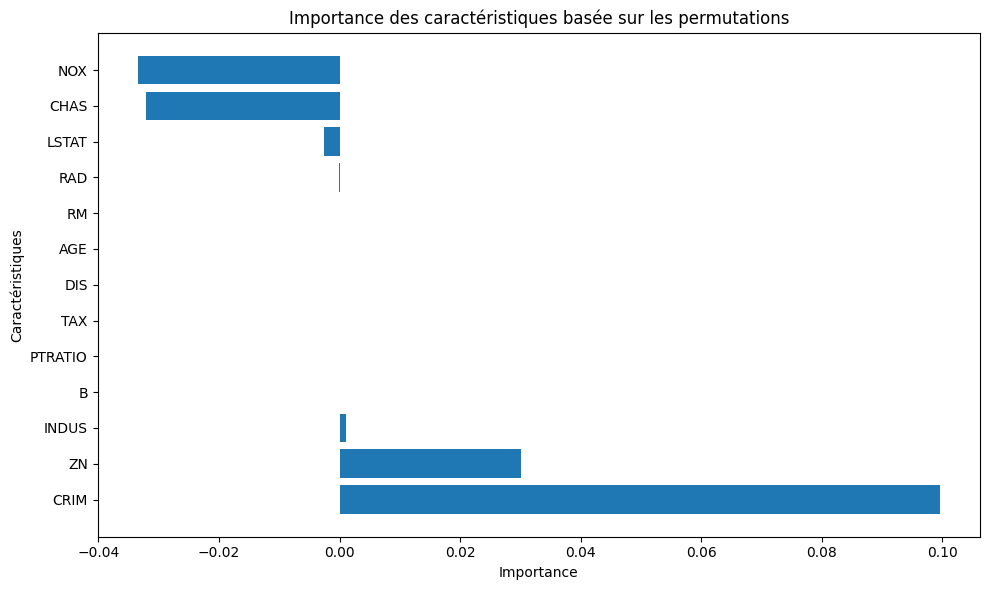

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calcul de l'importance des caractéristiques par permutations
result = permutation_importance(model_gbr, X, y, n_repeats=10, random_state=42)

# Récupération des valeurs d'importance et des noms de caractéristiques
importance = result.importances_mean
feature_names = X.columns

# Tri des valeurs d'importance dans l'ordre décroissant
sorted_indices = np.argsort(importance)[::-1]
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance)), sorted_importance, tick_label=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques basée sur les permutations')
plt.tight_layout()
plt.show()


### Importance des caractéritiques basée sur les impuretés

In [31]:
# Récupération de l'importance des caractéristiques
feature_importance = model_gbr.feature_importances_

# Tri des valeurs d'importance dans l'ordre croissant
sorted_importance = sorted(zip(X.columns, feature_importance), key=lambda x: x[1])

# Affichage des résultats dans l'ordre croissant
for feature_name, importance in sorted_importance:
    print(f"{feature_name}: {importance}")



B: 0.00017161565626719417
ZN: 0.0005408775697975938
LSTAT: 0.002072490684914289
INDUS: 0.0041898045750203535
TAX: 0.009173565930676534
DIS: 0.011433114655470573
RM: 0.01536481030803064
CRIM: 0.02299287890724875
CHAS: 0.030135244900184148
RAD: 0.034091280712540376
AGE: 0.07454162628489361
PTRATIO: 0.3745964211269304
NOX: 0.42069626868802557


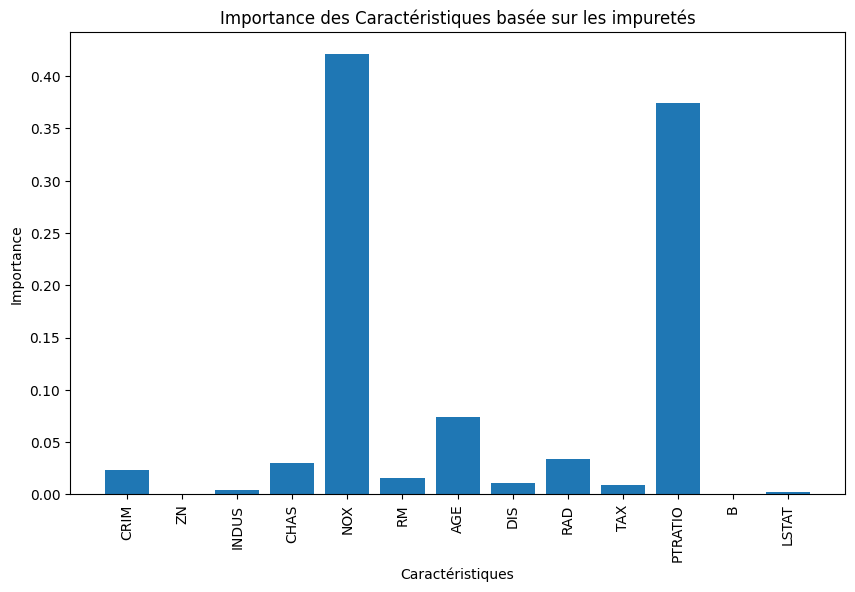

In [32]:
# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.title('Importance des Caractéristiques basée sur les impuretés')
plt.show()

En croisant ces infos avec la matrice de corrélation, on décide de supprimer les features : 
- ZN (car conditionnelle au lot de plus de 25000 sqft)
- B

### SHAP

[[ 0.91415875  0.66961523 -0.006677   ...  0.          0.02277816
   0.        ]
 [ 0.91415875 -0.26040592 -0.006677   ...  0.          0.00855675
   0.        ]
 [ 0.91415875 -0.26040592 -0.006677   ...  0.         -0.08221347
   0.        ]
 ...
 [ 0.91415875 -0.26040592 -0.006677   ...  0.          0.02277816
   0.        ]
 [ 0.91415875 -0.26040592 -0.006677   ...  0.          0.02277816
   0.        ]
 [ 0.91415875 -0.26040592 -0.006677   ...  0.          0.02277816
   0.        ]]


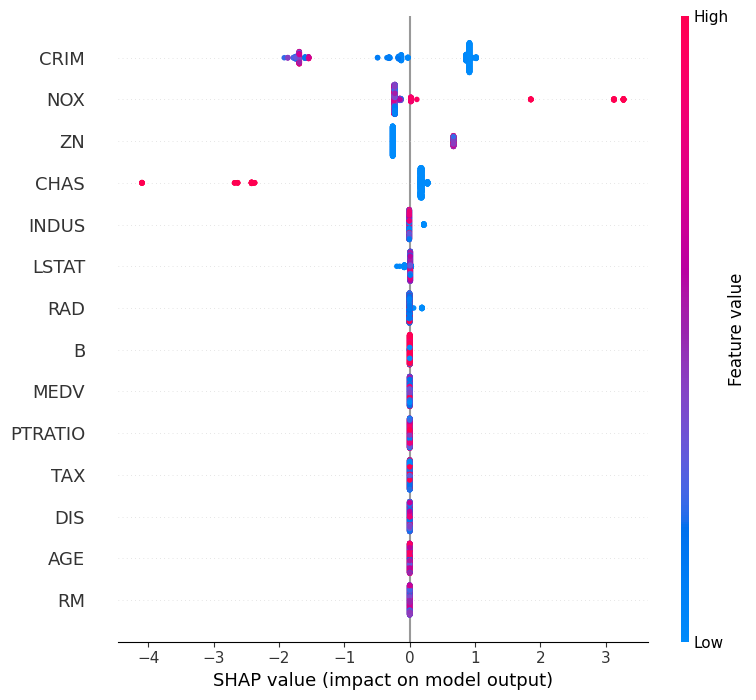

In [33]:
# Initialiser l'explainer SHAP avec les données et le modèle
explainer = shap.Explainer(model_gbr, df)

# Calculer les valeurs SHAP pour toutes les caractéristiques
shap_values = explainer.shap_values(df)

# Afficher les valeurs SHAP
print(shap_values)

# Tracer un graphique des importances des caractéristiques
shap.summary_plot(shap_values, df)

# Afficher le graphique
plt.show()

### Suppression des features ZN et B

In [34]:
X = df.drop(['MEDV', 'B'], axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Nouveau pipeline (sans les features supprimées)

In [35]:
numerical_features2 = ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'INDUS', 'ZN']
numerical_transformer = StandardScaler()

preprocessor2 = ColumnTransformer(
    transformers=[
        
        ('num', numerical_transformer, numerical_features2),
    ], remainder="passthrough"
)

### Test du nouveau modèle

In [36]:
pipe_gbr2 = Pipeline([
     ('prep', preprocessor2),
     ('model', model_gbr)
])

# Entrainement sur X_train
trained_model_gbr2 = pipe_gbr2.fit(X_train,y_train)

# scoring sur X_test
print(trained_model_gbr2.score(X_test, y_test))

0.9159516502187017


Hyperparamètres par défaut :  
- n_estimators : 100
- learning_rate : 0.1
- max_depth : 3
- min_samples_split : 2
- min_samples_leaf : 1
- max_features : None

## Meilleur modèle

### Recherche des meilleurs hyperparamètres (Optuna)

In [37]:
from sklearn.metrics import mean_squared_error
import optuna

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    subsample = trial.suggest_float('subsample', 0.1, 1.0)

    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        subsample=subsample
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return r2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Meilleurs hyperparamètres:", study.best_params)
print("R2 avec les meilleurs hyperparamètres:", study.best_value)

[I 2023-06-13 16:13:53,470] A new study created in memory with name: no-name-ad0ffee8-665c-499b-99cb-0b8e160e92db
[I 2023-06-13 16:13:53,586] Trial 0 finished with value: 0.9111203500537245 and parameters: {'learning_rate': 0.08054450273573609, 'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'subsample': 0.7296342585971893}. Best is trial 0 with value: 0.9111203500537245.
[I 2023-06-13 16:13:54,173] Trial 1 finished with value: 0.8991800303076835 and parameters: {'learning_rate': 0.06827224891059817, 'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'auto', 'subsample': 0.4819600095989027}. Best is trial 0 with value: 0.9111203500537245.
[I 2023-06-13 16:13:54,361] Trial 2 finished with value: 0.8638991600842497 and parameters: {'learning_rate': 0.035472221006116196, 'n_estimators': 300, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt', 's

Meilleurs hyperparamètres: {'learning_rate': 0.07744270842577489, 'n_estimators': 700, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'auto', 'subsample': 0.8147530547475641}
R2 avec les meilleurs hyperparamètres: 0.9302431544429083


Meilleurs hyperparamètres: {'n_estimators': 579, 'learning_rate': 0.0731645148741222, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'auto'}

### Entrainement du modèle avec les meilleurs hyperparamètres défini avec Optuna

In [40]:
# Création du nouveau modèle avec les meilleurs hyperparamètres
best_params = study.best_params
model_gbr_best = GradientBoostingRegressor(**best_params)

# Création du pipeline avec le nouveau modèle et le préprocesseur
pipe_gbr2 = Pipeline([
     ('prep', preprocessor2),
     ('model', model_gbr_best)
])

# Entraînement sur X_train
trained_model_gbr2 = pipe_gbr2.fit(X_train, y_train)

# Scoring sur X_test
print(trained_model_gbr2.score(X_test, y_test))


0.912947322781795


In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prédiction sur les données de test
y_pred = trained_model_gbr2.predict(X_test)

# Calcul du coefficient de détermination (R^2)
r2 = r2_score(y_test, y_pred)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des métriques
print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


R2: 0.912947322781795
MSE: 6.383902154645429
RMSE: 2.526638508897826
MAE: 1.8342524945166867


### Courbe d'apprentissage

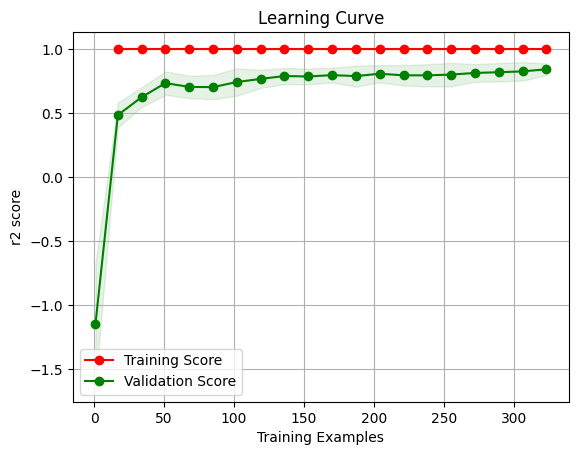

In [42]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.001, 1.0, 20), cv=5)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("r2 score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")
    
    plt.legend(loc="best")
    plt.show()

# Utilisation de la fonction pour tracer les courbes d'apprentissage
plot_learning_curve(trained_model_gbr2, X_train, y_train)


### Comparaison des valeurs prédites et des vraies valeurs

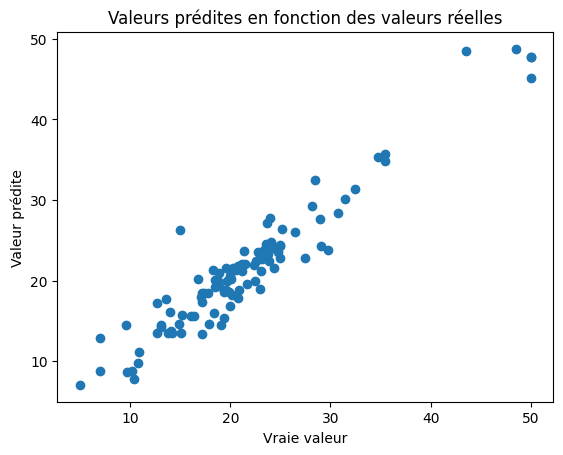

In [43]:
import matplotlib.pyplot as plt

# Obtenir les valeurs prédites du modèle
y_pred = trained_model_gbr2.predict(X_test)

# Tracer le graphique
plt.scatter(y_test, y_pred)
plt.xlabel('Vraie valeur')
plt.ylabel('Valeur prédite')
plt.title('Valeurs prédites en fonction des valeurs réelles​')
plt.show()


In [44]:
trained_model_gbr2

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['CRIM', 'NOX', 'RM', 'AGE',
                                                   'DIS', 'TAX', 'PTRATIO',
                                                   'LSTAT', 'INDUS', 'ZN'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.07744270842577489,
                                           max_depth=6, max_features='auto',
                                           min_samples_leaf=3,
                                           min_samples_split=4,
                                           n_estimators=700,
                                           subsample=0.8147530547475641))])